In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("nba_data.csv")
advanced = pd.read_csv("advanced_stats.txt")
df = data.merge(advanced, on='Player').drop_duplicates()

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'advanced_stats.txt'

In [ ]:
df.columns

In [ ]:
df = df.drop(columns = ['Pos_y', 'Age_y', 'Tm_y', 'G_y', 'MP_y'])
df = df.rename(columns={'Pos_x': 'Pos', 'Age_x': 'Age', 'Tm_x':'Tm', 'G_x':'G', 'MP_x':'MP'})
df.dropna(inplace=True)

2p%, 3p%, efg%, ft%, ppg, TRB%, AST%, STL%, BLK%, TOV%

In [8]:
df['ppg'] = round(df['PTS'] / df['G'], 2)

In [9]:
# Exclude players who have played approx. less than 10% of their teams games
df = df[(df['G'] > 5) | (df['MP'] >= 50) | (df['FGA'] >= 10)]
df.sort_values("MP")
temp =df.copy()

In [10]:
# Extract the players who have been traded 
traded = df[df['Tm'] == 'TOT']
traded = traded.drop_duplicates('Player')

traded_names = list(traded['Player'])

traded

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ppg
11,Nikola Vučević,C,30,TOT,46,46,1558,454,937,0.485,...,29.8,2.7,2.1,4.8,0.147,5.5,0.2,5.7,3.0,24.39
17,James Harden,PG-SG,31,TOT,40,40,1527,329,711,0.463,...,28.9,5.1,1.6,6.7,0.210,6.2,0.4,6.6,3.3,26.08
33,Norman Powell,SG,27,TOT,44,33,1340,292,585,0.499,...,24.0,2.4,0.8,3.3,0.117,1.6,-0.6,1.1,1.0,19.50
71,Gary Trent Jr.,SG,22,TOT,44,26,1359,229,560,0.409,...,19.9,1.2,0.0,1.2,0.043,-0.5,-2.2,-2.7,-0.2,14.59
79,Victor Oladipo,SG,28,TOT,29,29,969,219,533,0.411,...,28.9,-0.3,1.0,0.7,0.037,0.2,-0.7,-0.5,0.4,20.83
89,Jarrett Allen,C,22,TOT,44,26,1262,209,330,0.633,...,16.9,3.5,1.6,5.1,0.194,2.2,0.1,2.3,1.4,13.07
119,Evan Fournier,SF,28,TOT,27,26,820,170,379,0.449,...,25.7,1.0,0.7,1.7,0.101,1.4,-0.8,0.7,0.5,18.93
137,Kelly Olynyk,C,29,TOT,45,40,1216,177,401,0.441,...,17.6,0.5,1.9,2.4,0.094,-1.4,0.9,-0.4,0.5,10.51
165,Hamidou Diallo,SG,22,TOT,34,5,807,151,311,0.486,...,22.9,0.4,1.0,1.4,0.085,-1.9,0.5,-1.4,0.1,11.94
168,Daniel Theis,C,28,TOT,43,37,1049,162,293,0.553,...,15.0,1.8,1.1,2.9,0.132,-0.5,0.7,0.2,0.6,9.37


In [23]:
#traded.groupby('Player').apply(lambda t: t.iloc[1])

In [11]:
# Drop all the player that are in the traded_names list
df = df[~(df['Player'].isin(traded_names))]

# Added traded players back to df
df = pd.concat([df,traded])

# Clean df with all players once
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ppg
0,Damian Lillard,PG,30,POR,44,44,1591,404,905,0.446,...,32.5,6.7,0.2,6.9,0.207,7.5,-1.9,5.6,3.1,29.77
1,Bradley Beal,SG,27,WAS,41,41,1454,449,926,0.485,...,34.5,3.1,1.0,4.1,0.134,5.3,-1.4,3.9,2.2,31.32
2,Nikola Jokić,C,25,DEN,46,46,1640,489,857,0.571,...,29.1,8.4,2.2,10.6,0.311,9.5,2.6,12.1,5.8,26.93
3,Zach LaVine,SG,25,CHI,45,45,1577,442,862,0.513,...,30.8,3.3,1.4,4.6,0.141,4.6,-1.1,3.6,2.2,27.51
4,Giannis Antetokounmpo,PF,26,MIL,43,43,1461,442,795,0.556,...,32.7,4.8,2.4,7.3,0.239,6.0,2.5,8.5,3.9,28.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,Luke Kornet,PF,25,TOT,15,0,120,16,38,0.421,...,15.4,0.1,0.1,0.2,0.092,1.9,1.1,3.0,0.2,2.93
481,Chris Silva,PF,24,TOT,12,0,84,10,14,0.714,...,16.3,0.1,0.1,0.2,0.137,-5.0,1.0,-4.0,0.0,2.67
484,Chandler Hutchison,SF,24,TOT,8,0,89,13,29,0.448,...,18.0,-0.2,0.1,-0.1,-0.061,-6.9,-1.6,-8.4,-0.1,3.88
488,Maurice Harkless,SF,27,TOT,13,3,150,10,22,0.455,...,8.2,0.0,0.1,0.2,0.051,-2.8,-0.3,-3.1,0.0,2.15


# Exploratory Analysis

In [13]:
data[data.duplicated("Player")]
data[data['Player'] == "James Harden"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
15,James Harden,PG-SG,31,TOT,40,40,1527,329,711,0.463,...,34,293,327,448,50,29,170,93,1043,40824000


Text(0.5, 1.0, 'Heatmap to Analyze Stat Relationships')

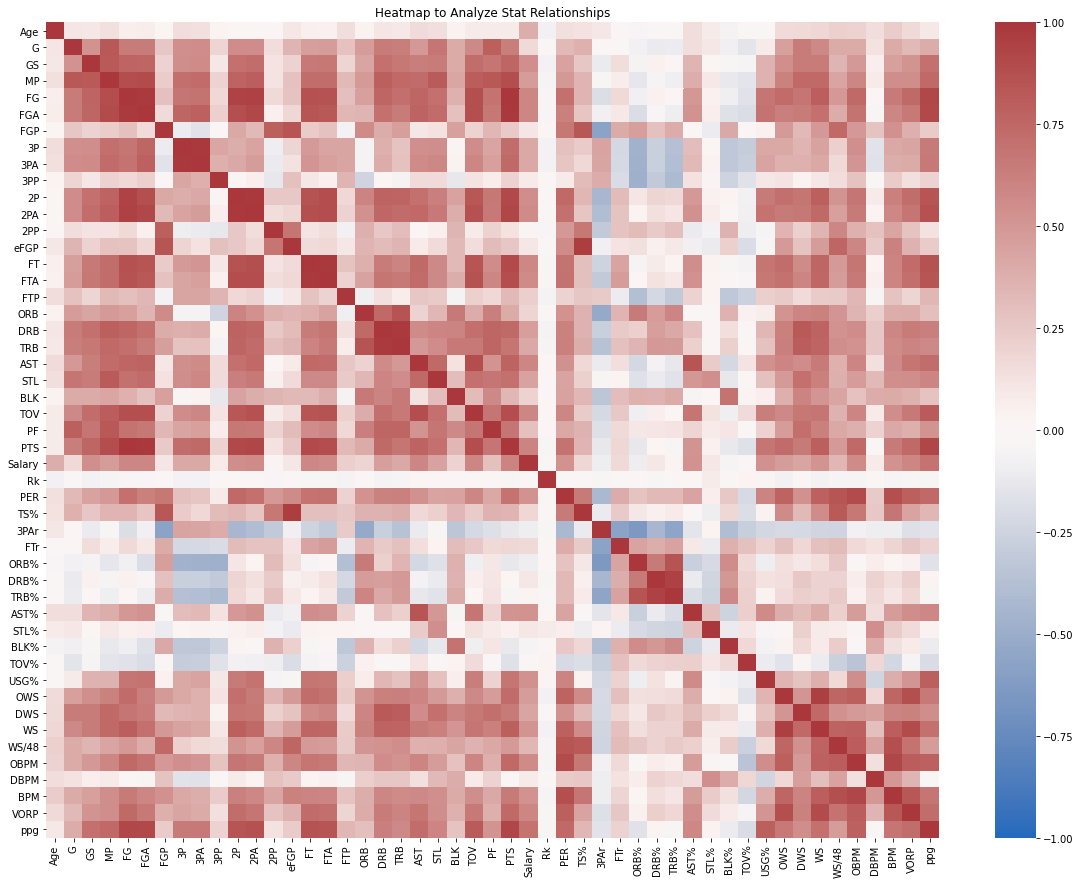

In [14]:
# Take a look to see the relationship between variables 
fig = plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap='vlag', vmin=-1, vmax=1)
plt.title('Heatmap to Analyze Stat Relationships')

<AxesSubplot:xlabel='3PP', ylabel='PER'>

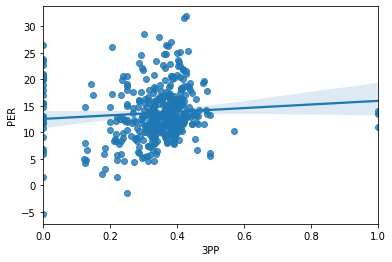

In [15]:
sns.regplot('3PP', 'PER', data=df)

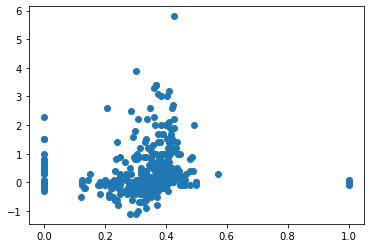

In [16]:
#fig = plt.figure(figsize= (10,10))
plt.scatter('3PP', 'VORP', data=df)

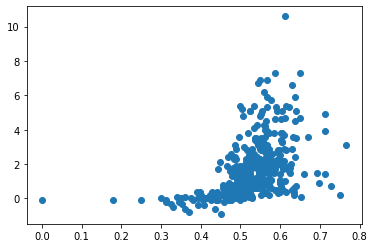

In [17]:
plt.scatter("eFGP", 'WS', data=df)

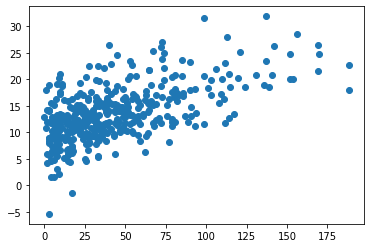

In [18]:
plt.scatter('TOV', 'PER', data=df)

# Creating WAR

In [35]:
# First WAR - Normal percentages
# Second WAR - Scale WAR based on minutes or games started/games played
# Third WAR - Compare WAR to yearly salary

In [19]:
averages = df[['Player', '2PP', '3PP', 'eFGP', 'FTP', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%']]
averages.set_index("Player", inplace=True)
averages[['TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%']] = averages[['TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%']].copy() / 100
average_list = list(averages.mean())

print(average_list)

[0.5161711491442543, 0.32706845965770154, 0.527056234718826, 0.753738386308069, 0.1013960880195599, 0.13709535452322738, 0.014738386308068426, 0.018990220048899723, 0.1241466992665037]


/Users/vivekdivakarla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [20]:
# efficiency WAR weights
weights = [0.12, 0.16, 0.28, 0.08, 0.04, 0.32, 0.48, 0.48, -0.48]

zero_war = 0
for i in range(len(weights)):
    zero_war += weights[i] * average_list[i]

print(f"The Average Player currently has a {round(zero_war,3)} WAR")

The Average Player currently has a 0.327 WAR


In [21]:
# Test our formula on Damian Lilliard
dame = averages.iloc[:1].values

total = 0
for i in range(len(weights)):
    total += weights[i] * dame[0][i]
    
print("Damian Lillard's WAR is", round(total,7))

Damian Lillard's WAR is 0.42372


In [22]:
### Don't know if this is necessary, but if we're comparing to "average" player then I think we would want to compare player
# to the average. I don't know if we should go even further and standardize them by scaling the values by the std

# Subtract the players to the mean so that all stats are in context of "player vs average player" 
demeaned = averages-averages.mean()

# Calculate war for every player using our weights
#average player has a WAR of 0
#scaled up to an 82 game season
demeaned['Efficiency WAR'] = np.dot(demeaned, weights) * 82
demeaned.sort_values('Efficiency WAR', ascending=False)

,2PP,3PP,eFGP,FTP,TRB%,AST%,STL%,BLK%,TOV%,Efficiency WAR
Player,,,,,,,,,,
Nikola Jokić,0.088829,0.100932,0.084944,0.114262,0.075604,0.261905,0.007262,-0.00099,0.001853,12.192418
Joe Ingles,0.131829,0.163932,0.184944,0.114262,-0.028396,0.093905,-0.002738,-0.01299,0.030853,8.981298
Luka Dončić,0.039829,0.040932,0.026944,-0.005738,0.025604,0.319905,-0.000738,-0.00199,0.024853,8.902578
Stephen Curry,0.044829,0.081932,0.062944,0.173262,-0.017396,0.189905,0.004262,-0.01699,-0.007147,8.804178
Kyrie Irving,0.064829,0.073932,0.060944,0.139262,-0.024396,0.131905,0.002262,-0.00499,-0.031147,8.420418
...,...,...,...,...,...,...,...,...,...,...
Rodions Kurucs,-0.087171,-0.151068,-0.214056,-0.253738,-0.018396,-0.051095,0.016262,0.02001,0.141853,-14.975822
Bruno Fernando,-0.054171,-0.327068,-0.098056,-0.128738,0.105604,-0.067095,-0.008738,-0.00299,0.175853,-16.717502
Andre Roberson,-0.349171,-0.202068,-0.348056,-0.253738,0.031604,-0.063095,0.008262,-0.00499,-0.006147,-16.924142


Text(0.5, 1.0, 'Efficiency WAR Distribtion')

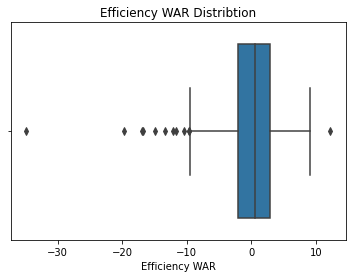

In [23]:
wars = list(demeaned['Efficiency WAR'])
w = sns.boxplot(wars)
w
plt.xlabel('Efficiency WAR')
plt.title('Efficiency WAR Distribtion')

In [24]:
demeaned.mean()['Efficiency WAR'] # average player now has 0 WAR

1.0671170548670942e-14

In [26]:
avg_mins = sum(list(df['MP'])) / len(df)
avg_mins


778.8166259168704

In [27]:
#scale efficiency war to incorporate volume
#use ppg
#1. find players ppg compared to average (ppg - avg ppg) / avg ppggoog
#2. add value from step 1 to efficiency war

In [28]:
df['+/- ppg'] = (df['ppg'] - df['ppg'].mean()) / df['ppg'].mean()
df['+/- fga'] = (df['FGA'] - df['FGA'].mean()) / df['FGA'].mean()
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,ppg,+/- ppg,+/- fga
0,Damian Lillard,PG,30,POR,44,44,1591,404,905,0.446,...,0.2,6.9,0.207,7.5,-1.9,5.6,3.1,29.77,1.916481,2.143749
1,Bradley Beal,SG,27,WAS,41,41,1454,449,926,0.485,...,1.0,4.1,0.134,5.3,-1.4,3.9,2.2,31.32,2.068330,2.216698
2,Nikola Jokić,C,25,DEN,46,46,1640,489,857,0.571,...,2.2,10.6,0.311,9.5,2.6,12.1,5.8,26.93,1.638255,1.977009
3,Zach LaVine,SG,25,CHI,45,45,1577,442,862,0.513,...,1.4,4.6,0.141,4.6,-1.1,3.6,2.2,27.51,1.695076,1.994377
4,Giannis Antetokounmpo,PF,26,MIL,43,43,1461,442,795,0.556,...,2.4,7.3,0.239,6.0,2.5,8.5,3.9,28.42,1.784226,1.761636


In [69]:
demeaned = demeaned.reset_index()
df = df.merge(demeaned, on='Player')
df


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,2PP,3PP,eFGP,FTP,TRB%,AST%,STL%,BLK%,TOV%,Efficiency WAR_y
0,Nikola Jokić,C,25,DEN,46,46,1640,489,857,0.571,...,0.088829,0.100932,0.084944,0.114262,0.075604,0.261905,0.007262,-0.00099,0.001853,12.192418
1,Joe Ingles,SF,33,UTA,42,11,1115,172,321,0.536,...,0.131829,0.163932,0.184944,0.114262,-0.028396,0.093905,-0.002738,-0.01299,0.030853,8.981298
2,Luka Dončić,PG,21,DAL,40,40,1401,403,834,0.483,...,0.039829,0.040932,0.026944,-0.005738,0.025604,0.319905,-0.000738,-0.00199,0.024853,8.902578
3,Stephen Curry,PG,32,GSW,40,40,1346,386,813,0.475,...,0.044829,0.081932,0.062944,0.173262,-0.017396,0.189905,0.004262,-0.01699,-0.007147,8.804178
4,Kyrie Irving,PG,28,BRK,32,32,1137,345,664,0.520,...,0.064829,0.073932,0.060944,0.139262,-0.024396,0.131905,0.002262,-0.00499,-0.031147,8.420418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Rodions Kurucs,SF-PF,22,TOT,16,0,91,6,24,0.250,...,-0.087171,-0.151068,-0.214056,-0.253738,-0.018396,-0.051095,0.016262,0.02001,0.141853,-14.975822
405,Bruno Fernando,C,22,ATL,23,0,169,12,28,0.429,...,-0.054171,-0.327068,-0.098056,-0.128738,0.105604,-0.067095,-0.008738,-0.00299,0.175853,-16.717502
406,Andre Roberson,SG,29,BRK,5,0,63,2,14,0.143,...,-0.349171,-0.202068,-0.348056,-0.253738,0.031604,-0.063095,0.008262,-0.00499,-0.006147,-16.924142
407,Vincent Poirier,C,27,PHI,10,0,39,3,12,0.250,...,-0.243171,-0.327068,-0.277056,-0.420738,0.095604,-0.072095,-0.014738,0.04801,0.090853,-19.649822


In [68]:
df['Volume WAR'] = df['Efficiency WAR'] + df['+/- ppg'] +  df['+/- fga'] 
df.sort_values("Efficiency WAR", ascending=False, inplace=True)

In [31]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FGP', '3P',
       '3PA', '3PP_x', '2P', '2PA', '2PP_x', 'eFGP_x', 'FT', 'FTA', 'FTP_x',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary',
       'Rk', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%_x', 'AST%_x',
       'STL%_x', 'BLK%_x', 'TOV%_x', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'ppg', '+/- ppg', '+/- fga', '2PP_y',
       '3PP_y', 'eFGP_y', 'FTP_y', 'TRB%_y', 'AST%_y', 'STL%_y', 'BLK%_y',
       'TOV%_y', 'Efficiency WAR', 'Volume WAR'],
      dtype='object')

In [48]:
#Scale efficiency war to incorporate salary
#use player AAV data
#1. find players AAV compared to average (avg - player salary) / average salary (scale down to between -10 and 10)
#2. add that to efficiency war

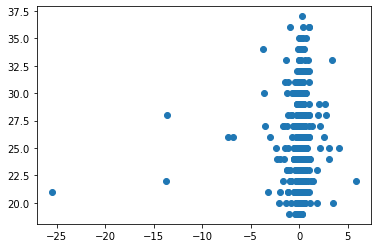

In [32]:
df['Vol_vs_Eff'] = (df['Volume WAR'] - df['Efficiency WAR']) / df['Efficiency WAR']
plt.scatter('Vol_vs_Eff', 'Age', data=df)

<BarContainer object of 409 artists>

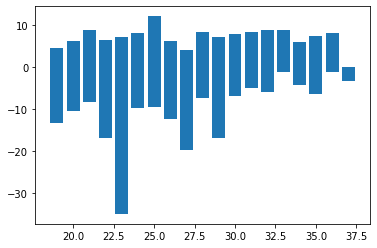

In [33]:
plt.bar('Age', "Efficiency WAR", data=df)
# Younger players have wider range, more likely to be given more of a chance

<AxesSubplot:xlabel='Age', ylabel='Efficiency WAR'>

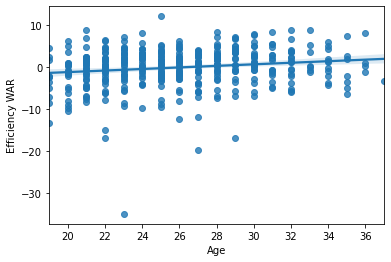

In [34]:
#sns.violinplot('Age', 'Efficiency WAR', data=df)
sns.regplot('Age', "Efficiency WAR", data=df)

<AxesSubplot:xlabel='Age', ylabel='Volume WAR'>

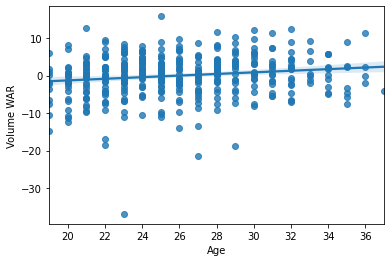

In [35]:
sns.regplot('Age', "Volume WAR", data=df)

<AxesSubplot:xlabel='Volume WAR', ylabel='FGA'>

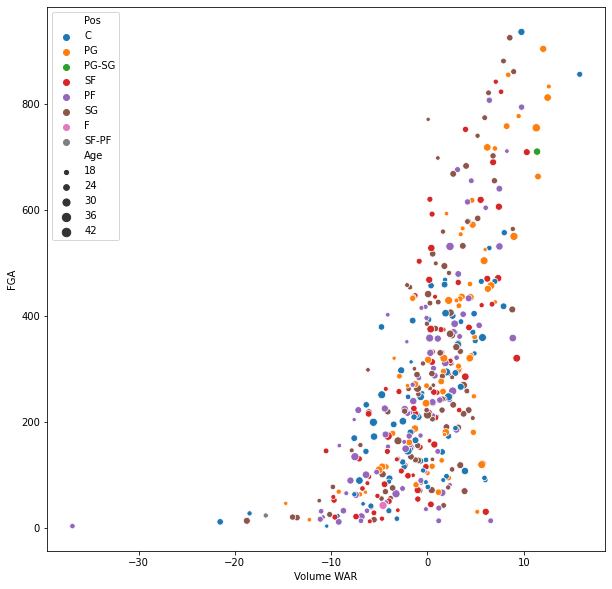

In [36]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot('Volume WAR', 'FGA', hue ='Pos', size='Age', data=df)

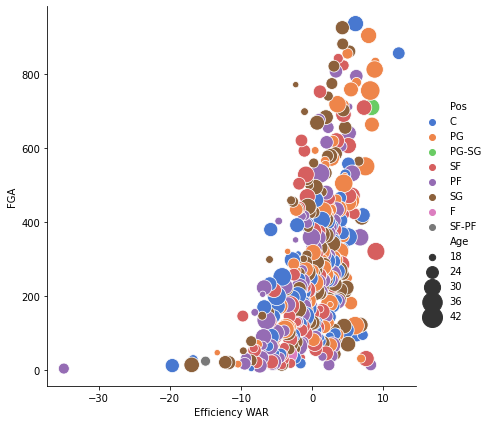

In [37]:
sns.relplot(x="Efficiency WAR", y="FGA", hue="Pos", size="Age",
            sizes=(40, 400), palette="muted",
            height=6, data=df)


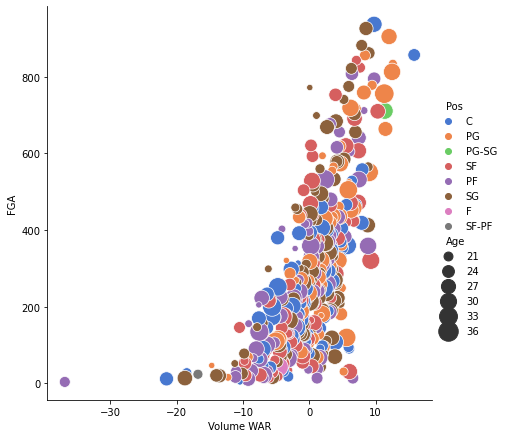

In [55]:
sns.relplot(x="Volume WAR", y="FGA", hue="Pos", size="Age",
            sizes=(40, 400), palette="muted",
            height=6, data=df)

<AxesSubplot:xlabel='Efficiency WAR', ylabel='FGA'>

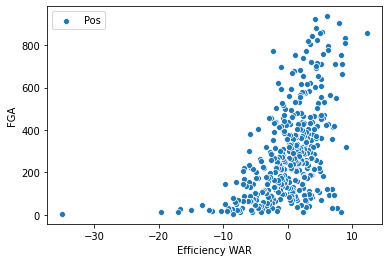

In [38]:
sns.scatterplot('Efficiency WAR', 'FGA', label ='Pos', data=df)

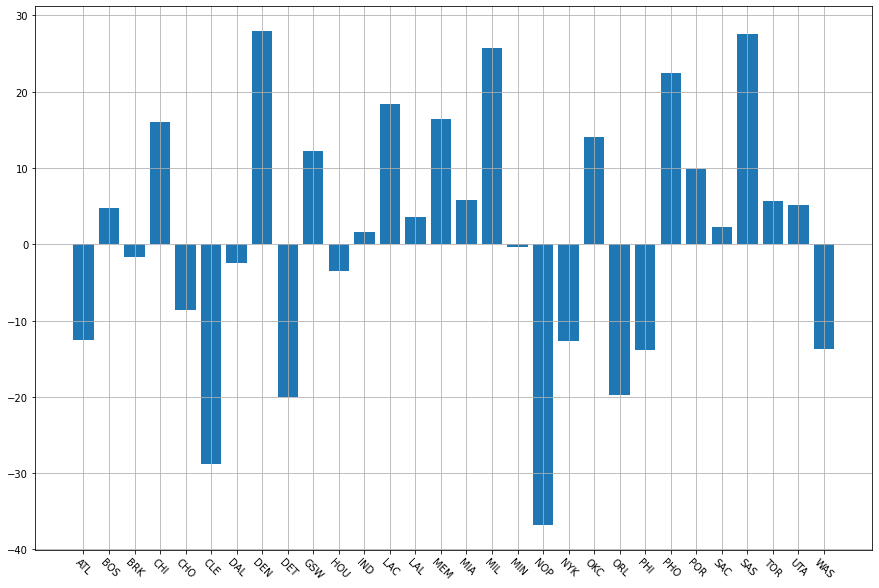

In [39]:
fig = plt.figure(figsize=(15,10))
league = df.groupby('Tm').mean().drop('TOT', axis=0)
plt.bar(league.index, 'Volume WAR', data=league)
plt.xticks(rotation=315)
plt.grid();

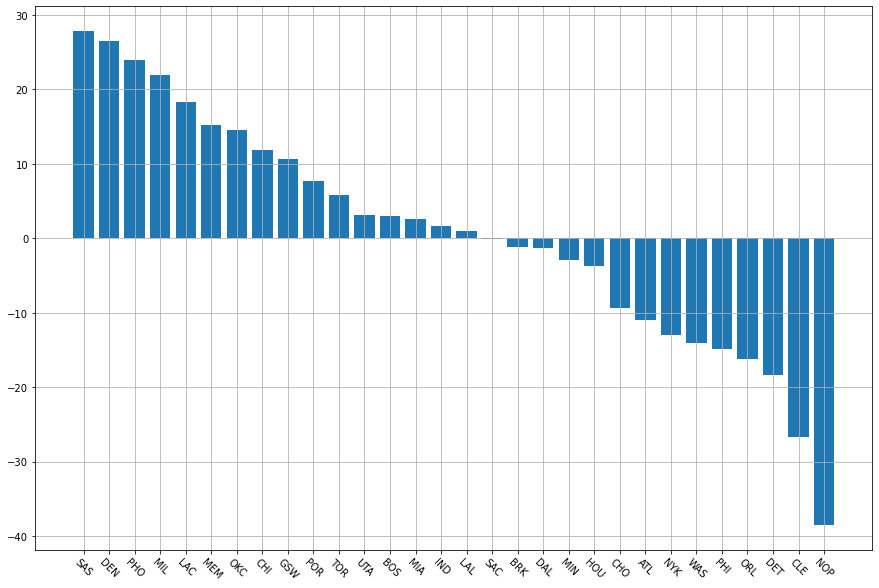

In [58]:
fig = plt.figure(figsize=(15,10))
league = df.groupby('Tm').sum().drop('TOT', axis=0).sort_values("Efficiency WAR", ascending=False)
plt.bar(league.index, 'Efficiency WAR', data=league)
plt.xticks(rotation=315)
plt.grid();

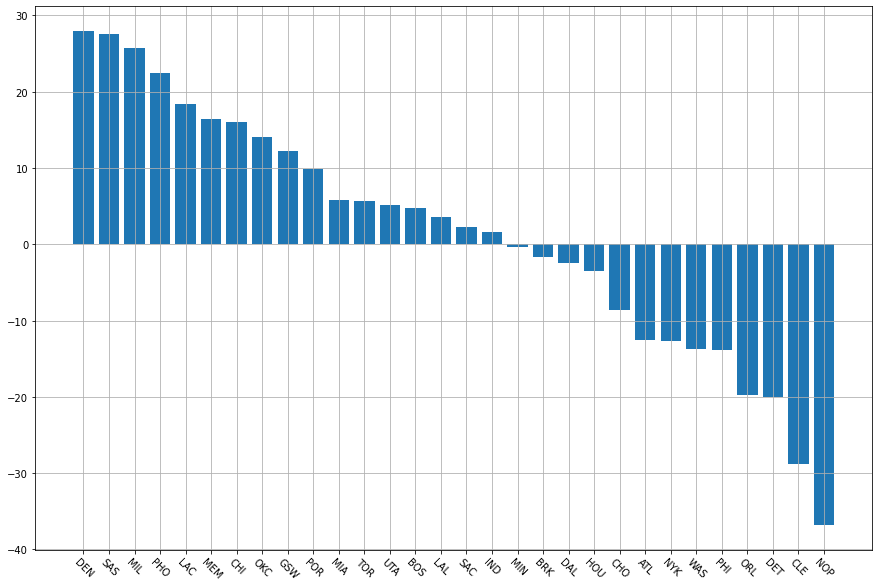

In [40]:
fig = plt.figure(figsize=(15,10))
league = df.groupby('Tm').sum().drop('TOT', axis=0).sort_values("Volume WAR", ascending=False)
plt.bar(league.index, 'Volume WAR', data=league)
plt.xticks(rotation=315)
plt.grid();

In [74]:
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,2PP,3PP,eFGP,FTP,TRB%,AST%,STL%,BLK%,TOV%,Efficiency WAR_y
0,Nikola Jokić,C,25,DEN,46,46,1640,489,857,0.571,...,0.088829,0.100932,0.084944,0.114262,0.075604,0.261905,0.007262,-0.00099,0.001853,12.192418
1,Joe Ingles,SF,33,UTA,42,11,1115,172,321,0.536,...,0.131829,0.163932,0.184944,0.114262,-0.028396,0.093905,-0.002738,-0.01299,0.030853,8.981298
2,Luka Dončić,PG,21,DAL,40,40,1401,403,834,0.483,...,0.039829,0.040932,0.026944,-0.005738,0.025604,0.319905,-0.000738,-0.00199,0.024853,8.902578
3,Stephen Curry,PG,32,GSW,40,40,1346,386,813,0.475,...,0.044829,0.081932,0.062944,0.173262,-0.017396,0.189905,0.004262,-0.01699,-0.007147,8.804178
4,Kyrie Irving,PG,28,BRK,32,32,1137,345,664,0.520,...,0.064829,0.073932,0.060944,0.139262,-0.024396,0.131905,0.002262,-0.00499,-0.031147,8.420418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Rodions Kurucs,SF-PF,22,TOT,16,0,91,6,24,0.250,...,-0.087171,-0.151068,-0.214056,-0.253738,-0.018396,-0.051095,0.016262,0.02001,0.141853,-14.975822
405,Bruno Fernando,C,22,ATL,23,0,169,12,28,0.429,...,-0.054171,-0.327068,-0.098056,-0.128738,0.105604,-0.067095,-0.008738,-0.00299,0.175853,-16.717502
406,Andre Roberson,SG,29,BRK,5,0,63,2,14,0.143,...,-0.349171,-0.202068,-0.348056,-0.253738,0.031604,-0.063095,0.008262,-0.00499,-0.006147,-16.924142
407,Vincent Poirier,C,27,PHI,10,0,39,3,12,0.250,...,-0.243171,-0.327068,-0.277056,-0.420738,0.095604,-0.072095,-0.014738,0.04801,0.090853,-19.649822


In [76]:
sortedWAR = df.sort_values('Efficiency WAR_y', ascending=False)

In [77]:
sortedWAR

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGP,...,2PP,3PP,eFGP,FTP,TRB%,AST%,STL%,BLK%,TOV%,Efficiency WAR_y
0,Nikola Jokić,C,25,DEN,46,46,1640,489,857,0.571,...,0.088829,0.100932,0.084944,0.114262,0.075604,0.261905,0.007262,-0.00099,0.001853,12.192418
1,Joe Ingles,SF,33,UTA,42,11,1115,172,321,0.536,...,0.131829,0.163932,0.184944,0.114262,-0.028396,0.093905,-0.002738,-0.01299,0.030853,8.981298
2,Luka Dončić,PG,21,DAL,40,40,1401,403,834,0.483,...,0.039829,0.040932,0.026944,-0.005738,0.025604,0.319905,-0.000738,-0.00199,0.024853,8.902578
3,Stephen Curry,PG,32,GSW,40,40,1346,386,813,0.475,...,0.044829,0.081932,0.062944,0.173262,-0.017396,0.189905,0.004262,-0.01699,-0.007147,8.804178
4,Kyrie Irving,PG,28,BRK,32,32,1137,345,664,0.520,...,0.064829,0.073932,0.060944,0.139262,-0.024396,0.131905,0.002262,-0.00499,-0.031147,8.420418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Rodions Kurucs,SF-PF,22,TOT,16,0,91,6,24,0.250,...,-0.087171,-0.151068,-0.214056,-0.253738,-0.018396,-0.051095,0.016262,0.02001,0.141853,-14.975822
405,Bruno Fernando,C,22,ATL,23,0,169,12,28,0.429,...,-0.054171,-0.327068,-0.098056,-0.128738,0.105604,-0.067095,-0.008738,-0.00299,0.175853,-16.717502
406,Andre Roberson,SG,29,BRK,5,0,63,2,14,0.143,...,-0.349171,-0.202068,-0.348056,-0.253738,0.031604,-0.063095,0.008262,-0.00499,-0.006147,-16.924142
407,Vincent Poirier,C,27,PHI,10,0,39,3,12,0.250,...,-0.243171,-0.327068,-0.277056,-0.420738,0.095604,-0.072095,-0.014738,0.04801,0.090853,-19.649822


In [78]:
rankinglist = []
for x in range(0,409):
    rankinglist.append(sortedWAR.at[x,'Player'])

In [79]:
rankinglist

['Nikola Jokić',
 'Joe Ingles',
 'Luka Dončić',
 'Stephen Curry',
 'Kyrie Irving',
 'James Harden',
 'Chris Silva',
 'LeBron James',
 'Damian Lillard',
 'Darius Miller',
 'Chris Paul',
 'Kawhi Leonard',
 'Chris Boucher',
 'Drew Eubanks',
 'CJ McCollum',
 'Tre Jones',
 'Tony Snell',
 'Kevin Durant',
 'Shai Gilgeous-Alexander',
 'Thomas Bryant',
 'Tyrese Haliburton',
 'Trae Young',
 'Giannis Antetokounmpo',
 'Nikola Vučević',
 'George Hill',
 'Mikal Bridges',
 'DeMar DeRozan',
 'Jimmy Butler',
 'Malcolm Brogdon',
 'Cameron Payne',
 'Mike Conley',
 'Zach LaVine',
 'Joe Harris',
 'Zion Williamson',
 'Tobias Harris',
 'Jrue Holiday',
 'Paul George',
 'Joel Embiid',
 'Al Horford',
 'Rodney McGruder',
 'Karl-Anthony Towns',
 "De'Aaron Fox",
 "De'Anthony Melton",
 'Jordan Poole',
 'Damion Lee',
 'Gorgui Dieng',
 'Bam Adebayo',
 'Terry Rozier',
 'LaMelo Ball',
 'Michael Porter Jr.',
 'Langston Galloway',
 'Jarrett Allen',
 'Kyle Lowry',
 'Jamal Murray',
 'Brandon Ingram',
 'Khris Middleton',
 '

In [85]:
for x in range(0,409):
    if sortedWAR.at[x,'Player'] == "Rudy Gobert":
        print(sortedWAR.at[x,'Efficiency WAR_y'])

-0.7143823960880082


In [1]:
sortedWAR.loc[6]

NameError: name 'sortedWAR' is not defined